<a href="https://colab.research.google.com/github/JohannaTejada/DiplomadoIA/blob/main/Ejemplo_Gestion_Datos_Banco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# carga de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# carga de github
url = 'https://github.com/arleyvilla/medicina/raw/refs/heads/main/dataset_banco.csv'

#Cargamos los CSV con los Datos
clientes_Banco = pd.read_csv(url)
clientes_Banco

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


#**Realizar Analisis del dataset**:

Verificar que informacion contiene, buscar informacion de quien construyo el dataset.


*Para este caso el dataset contiene la informacion de una entidad bancaria que contrata a una empresa de mercadeo para contactar telefónicamente a posibles clientes y determinar si están interesados o no en adquirir un CDT (certificado de depósito a término) con dicho banco. el archivo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.*

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto).


**Las columnas son**:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")


# **Identificar el problema que se quiere resolver con el dataset**:

## **¿Qué perfil tienen los clientes con mayor potencial de adquisición de un CDT en dicho banco?**


# **Limpieza**
Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

* Datos faltantes en algunas celdas
* Columnas irrelevantes (que no responden al problema del negocio "*lo que queremos resolver*")
* Registros (filas) repetidos
* Valores fuera de orden o extremos (outliers) en el caso de las variables numéricas. *Se deben analizar en detalle pues no necesariamente la solución es eliminarlos*
* Errores digitación en el caso de las variables categóricas
* Al final de este proceso de limpieza se debe tener un dataset integro, listo para la fase de Análisis Exploratorio, que nos permita responder el problema del negocio.

In [ ]:
#Listado de Columnas Dataset
clientes_Banco.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# **Analizar Datos faltantes**

* Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros segun lo visto en la descripcion del dataset ***clientes_Banco.info()***.

* El número total de registros debería ser **45.215**. Sin embargo columnas como "job" 45213, "marital" 45214, "education" 45214 , "balance", "duration" y "pdays". Por ser tan pocos los datos faltantes optaremos por eliminar las filas correspondientes:

In [ ]:
# Breve descripcion del dataset

# Mostramos el numero de filas y columnas
print(clientes_Banco.shape)

# Informacion Basica del Dataset
print('\n')
clientes_Banco.info()

(45215, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [ ]:
#Verificar si hay valores nulos, isnull() nos permite detectar datos nulos,
clientes_Banco.isnull().sum()

,0
age,0
job,2
marital,1
education,1
default,0
balance,2
housing,0
loan,0
contact,0
day,0


In [ ]:
##Verificar si hay valores nulos, si lo prefieres puedes usar notnull() en vez de isnull():
clientes_Banco.notnull().sum()

,0
age,45215
job,45213
marital,45214
education,45214
default,45215
balance,45213
housing,45215
loan,45215
contact,45215
day,45215


In [ ]:
#dropna: Eliminar valores nulos, esto solo se recomienda cuando hay muchos datos

# Dado que tenemos entre 1 y dos valores nulos por columna podemos eliminarlos
print(f'Tamaño del dataset antes de eliminar valores nulos: {clientes_Banco.shape}')
print('\n')
clientes_Banco.dropna(inplace=True)
print(f'Tamaño del dataset después de eliminar los valores nulos: {clientes_Banco.shape}')
print('\n')
clientes_Banco.info()


Tamaño del dataset antes de eliminar valores nulos: (45215, 17)


Tamaño del dataset después de eliminar los valores nulos: (45207, 17)


<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object

## Se eliminaron 8 filas que no estaban con los datos completos

## **Columnas irrelevantes**

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown" desconocido.
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 18.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

- ***Si se tiene duda de si alguna columna* puede ser relevante o no lo mejor es dejarla** (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En el caso de este dataset todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor

In [ ]:
clientes_Banco.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Para obtener el resumen estadístico de las categoricas:
clientes_Banco.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45207,45207,45207,45207,45207,45207,45207,45207,45207,45207
unique,18,6,10,2,2,6,5,12,6,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9730,27211,23192,44391,25125,37956,29278,13760,36954,39919


In [ ]:
# Conteo de los niveles en las columnas categóricas
cont_cat = ['job', 'marital', 'education', 'default','housing',
            'loan', 'contact', 'month', 'poutcome', 'y']

for col in cont_cat:
  print(f'Columna {col}: {clientes_Banco[col].nunique()} niveles')

Columna job: 18 niveles
Columna marital: 6 niveles
Columna education: 10 niveles
Columna default: 2 niveles
Columna housing: 2 niveles
Columna loan: 6 niveles
Columna contact: 5 niveles
Columna month: 12 niveles
Columna poutcome: 6 niveles
Columna y: 2 niveles


## **Dado que todas las columnas categóricas tienen más de *1 subnivel* indicando que no hay elementos con valor unico.**

- ### No se eliminara ninguna.


## **Verifiquemos lo que ocurre con las columnas numéricas.**

In [ ]:
clientes_Banco.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.**

- ### No se eliminara ninguna de las columnas numéricas.

## **Luego de analizar el dataset se encuentra que no cuenta con columnas con información redundante.**
- ### Por lo que que no se elimina ninguna columna por este ítem.

## **Filas repetidas o Duplicadas**

In [ ]:
print(f'Tamaño del dataset antes de eliminar las filas repetidas es: {clientes_Banco.shape}')
clientes_Banco.drop_duplicates(inplace=True)
print(f'Tamaño del dataset después de eliminar las filas repetidas es: {clientes_Banco.shape}')

Tamaño del dataset antes de eliminar las filas repetidas es: (45207, 17)
Tamaño del dataset después de eliminar las filas repetidas es: (45203, 17)


- ### Al ejecutar el comando anterior encontramos que se tienen **4 filas duplicadas por lo que se eliminan**

## **Corregir los tipos de datos, números y signos de número**

### Hay dos problemas principales con los números que pueden requerir que limpie los datos: el número se importó involuntariamente como texto y hay que cambiar el signo negativo y usar el estándar de su organización.

In [ ]:
clientes_Banco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45203 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45203 non-null  int64  
 1   job        45203 non-null  object 
 2   marital    45203 non-null  object 
 3   education  45203 non-null  object 
 4   default    45203 non-null  object 
 5   balance    45203 non-null  float64
 6   housing    45203 non-null  object 
 7   loan       45203 non-null  object 
 8   contact    45203 non-null  object 
 9   day        45203 non-null  int64  
 10  month      45203 non-null  object 
 11  duration   45203 non-null  float64
 12  campaign   45203 non-null  int64  
 13  pdays      45203 non-null  float64
 14  previous   45203 non-null  int64  
 15  poutcome   45203 non-null  object 
 16  y          45203 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


In [ ]:
# Para cambiar el tipo puede usar cualquiera de los siguientes comandos

# df["dataframe_column"] = df["dataframe_column"].astype(int)
# df["dataframe_column"] = df["dataframe_column"].apply(int)
# df["dataframe_column"] = df["dataframe_column"].map(int)
# df=df.astype({'dataframe_column': 'string', 'dataframe_column':'float64',
#              'dataframe_column': 'datetime64[ns]', 'dataframe_column': 'int'})

## **Corrige los valores de fecha y hora**

Debido a que hay distintos formatos de fecha y que estos formatos pueden confundirse con códigos de elemento numerado u otras cadenas que contienen barras diagonales o guiones, a menudo es necesario convertir y volver a dar formato a los valores de fecha y hora.

In [ ]:
# No se tienen columnas en este formato
# Pero para cambiar este tipo de datos se usa
#df['fecha']=pd.to_datetime(df["fecha"].dt.strftime('%Y-%m-%d'))


- ### En este caso, las columnas numéricas tienen el tipo correcto y el signo se analizara en **valores fuera de orden**.

## **Valores fuera de orden o extremos (*Outliers*) en las variables numéricas**

- ### No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

- ### Creemos gráficas de **cajon y vigotes "boxplot"** para cada una de las columnas numéricas

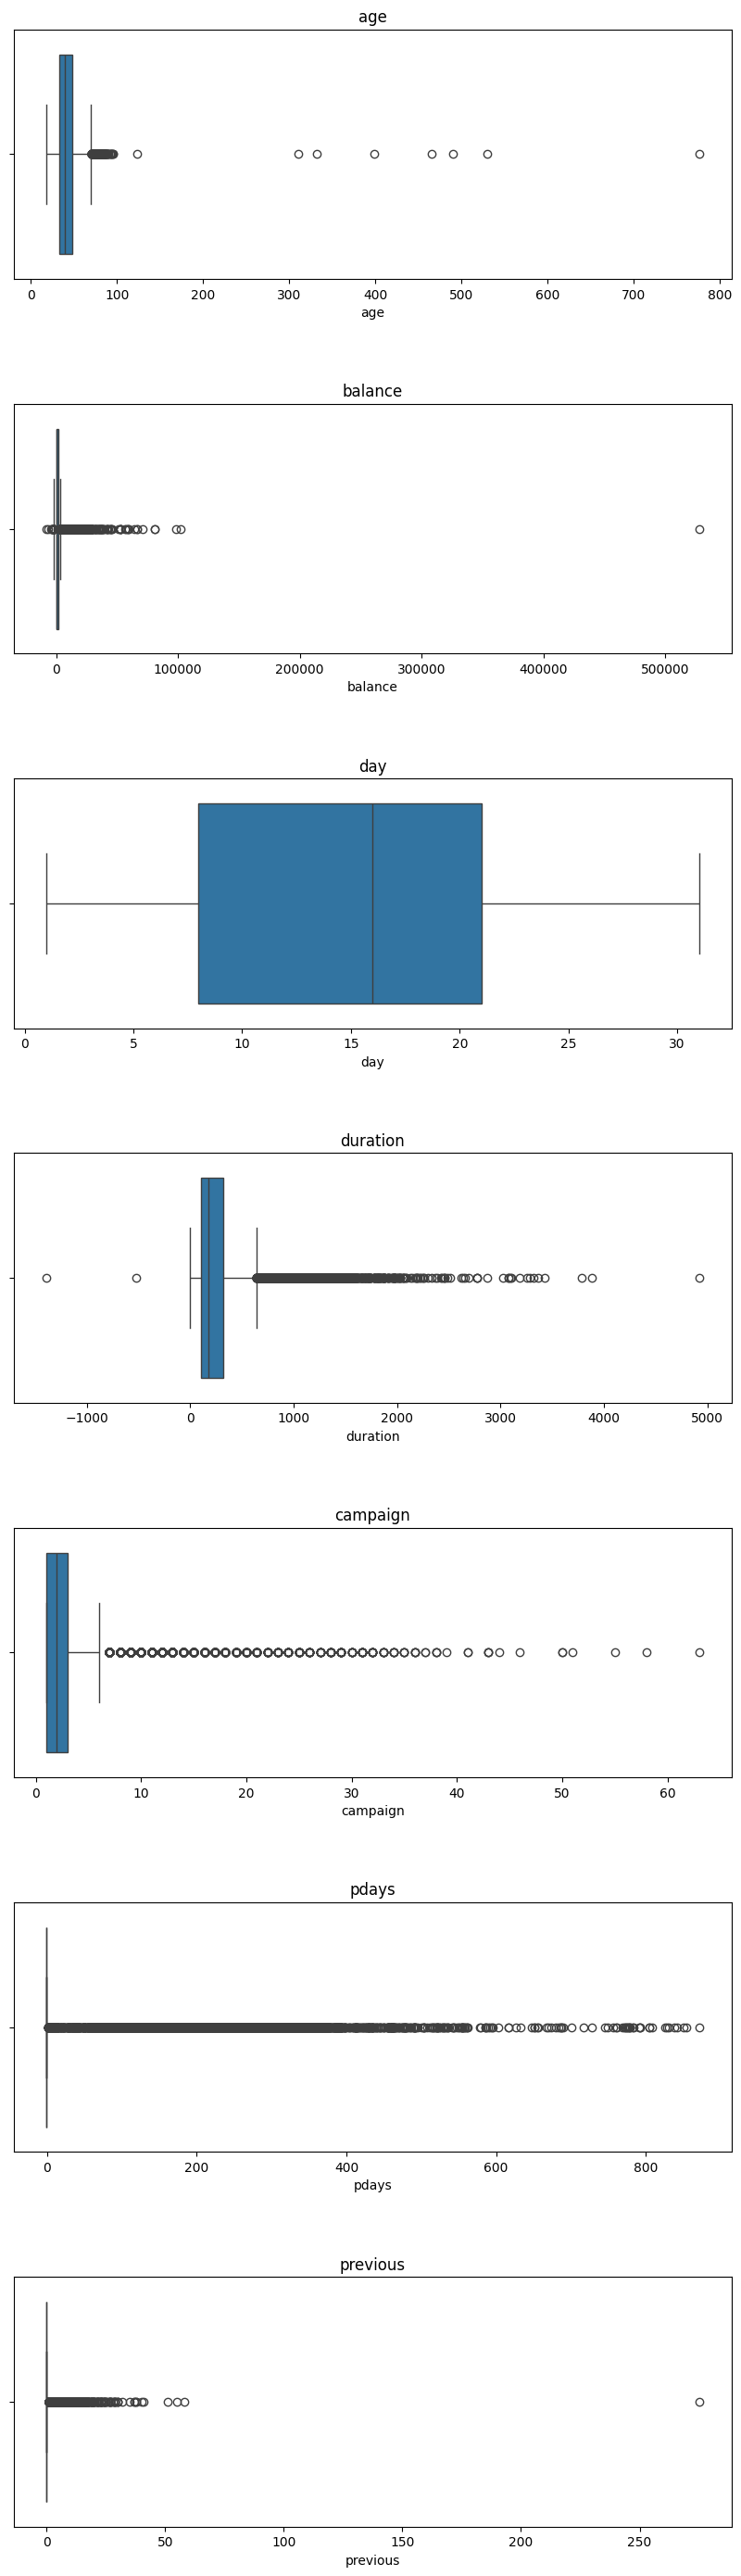

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
col_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']


fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,35))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=clientes_Banco, ax=ax[i])
    ax[i].set_title(col)

## **Observaciones de los datos numericos:**
- "**age**": hay sujetos con edades mucho mayores a 100 años
- "**duration**": hay valores negativos
- "**previous**": hay un valor extremadamente alto (cercano a 300)

### **Corregir o eliminar filas con "age">100**





In [ ]:
print(f'Tamaño del set antes de corregir o eliminar registros de edad: {clientes_Banco.shape}')
print(clientes_Banco['age'][clientes_Banco['age']>100].count())
promedio= clientes_Banco['age'].mean()
mediana= clientes_Banco['age'].median()
moda= clientes_Banco['age'].mode()[0]
print(promedio, mediana, moda)

#Buscar clientes con edad superior a 100 Años
print(clientes_Banco.loc[clientes_Banco['age']>100])

# Cambiar la edad de los mayores a 100 por la mediana
clientes_Banco.loc[clientes_Banco['age']>100,'age'] = mediana

print('\n')
#Buscar clientes con edad superior a 100 Años
print(clientes_Banco.loc[clientes_Banco['age']>100])

# Si se desea eliminar estos elementos del dataset puede usar la siguiente instruccion
#clientes_Banco = clientes_Banco[clientes_Banco['age']<=100]

print('\n')
print(f'Tamaño del set después de corregir registros de edad: {clientes_Banco.shape}')

Tamaño del set antes de corregir o eliminar registros de edad: (45203, 17)
8
41.00517664756764 39.0 32
       age            job   marital  education default  balance housing loan  \
229    530       services  divorced  secondary      no   1467.0     yes   no   
1076   490       services    single    primary      no    114.0     yes   no   
2229   123        student    single   tertiary      no    250.0     yes   no   
3018   332         admin.    single  secondary      no     91.0     yes   no   
5799   311  self-employed    single  secondary      no    360.0     yes   no   
6053   399    blue-collar   married    primary      no   2805.0     yes   no   
28152  466    blue-collar   married  secondary      no    120.0     yes  yes   
43530  776        retired   married  secondary      no    820.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
229      unknown    5   may     124.0         1   -1.0         0  unknown   no  
1076     unkno

- ### En este caso, se corrigieron 8 filas en **valores fuera de orden**.

In [ ]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar o corregir los registros de duración: {clientes_Banco.shape}')

# contar los elementos que tienen duracion menor a 0 seg
print(clientes_Banco['duration'][clientes_Banco['duration']<=0].count())

promedio= clientes_Banco['duration'].mean()
mediana= clientes_Banco['duration'].median()
moda= clientes_Banco['duration'].mode()[0]
print(clientes_Banco['duration'].describe())
print(promedio, mediana, moda)

# Si se desea eliminar estos elementos del dataset puede usar la siguiente instruccion
clientes_Banco = clientes_Banco[clientes_Banco['duration']>0]

print(f'Tamaño del set después de eliminar o corregir los registros de duración: {clientes_Banco.shape}')

Tamaño del set antes de eliminar o corregir los registros de duración: (45203, 17)
5
count    45203.000000
mean       258.039754
std        257.470045
min      -1389.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
258.0397539986284 180.0 124.0
Tamaño del set después de eliminar o corregir los registros de duración: (45198, 17)


In [ ]:
# Eliminar filas con número de veces que ha sido contactada antes de esta campaña "previous">100
print(f'Tamaño del set antes de eliminar registros de previous: {clientes_Banco.shape}')

# contar los elementos que tienen "previous">100
print(clientes_Banco['previous'][clientes_Banco['previous']>100].count())

clientes_Banco = clientes_Banco[clientes_Banco['previous']<=100]
print(f'Tamaño del set después de eliminar registros de previous: {clientes_Banco.shape}')

Tamaño del set antes de eliminar registros de previous: (45198, 17)
1
Tamaño del set después de eliminar registros de previous: (45197, 17)


## **Combinar y dividir columnas**

### Una tarea común después de importar los datos desde un origen de datos externos es combinar dos o más columnas en una, o dividir una columna en dos o más columnas.

### **Por ejemplo**:
* ### Podría querer dividir una columna que contiene un nombre completo en un nombre y apellido.

* ### Podría querer dividir una columna que contiene un campo de dirección en columnas independientes de calle, ciudad, región y código postal.
* ### También puede ocurrir a la inversa en vez de dividir queremos combinar. Puede que quiera combinar una columna de nombre y apellido en una columna de nombre completo o combinar columnas de dirección independientes en una sola columna.
* ### Los valores comunes adicionales que podrían requerir combinar en una columna o dividir en varias columnas incluyen códigos de producto, rutas de acceso de archivo, entre otros.

### Dato que el dataset no tiene estas caracteristicas veamos un ejemplo:

In [ ]:
# df=df.replace(to_replace=r'.\(.+\)$', value='', regex=True)


import pandas as pd
df = pd.DataFrame({'X': ["zeppy", "amid", "amily"],
                   'Y': ["xar", "abc", "among"],
                   'Z': ['11.2 (15:30)', '10.0 (03:40)', '64 (22:20)']})
df

,X,Y,Z
0,zeppy,xar,11.2 (15:30)
1,amid,abc,10.0 (03:40)
2,amily,among,64 (22:20)


## **Errores de digitacion en variables categóricas**

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

<ipython-input-19-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-19-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed n

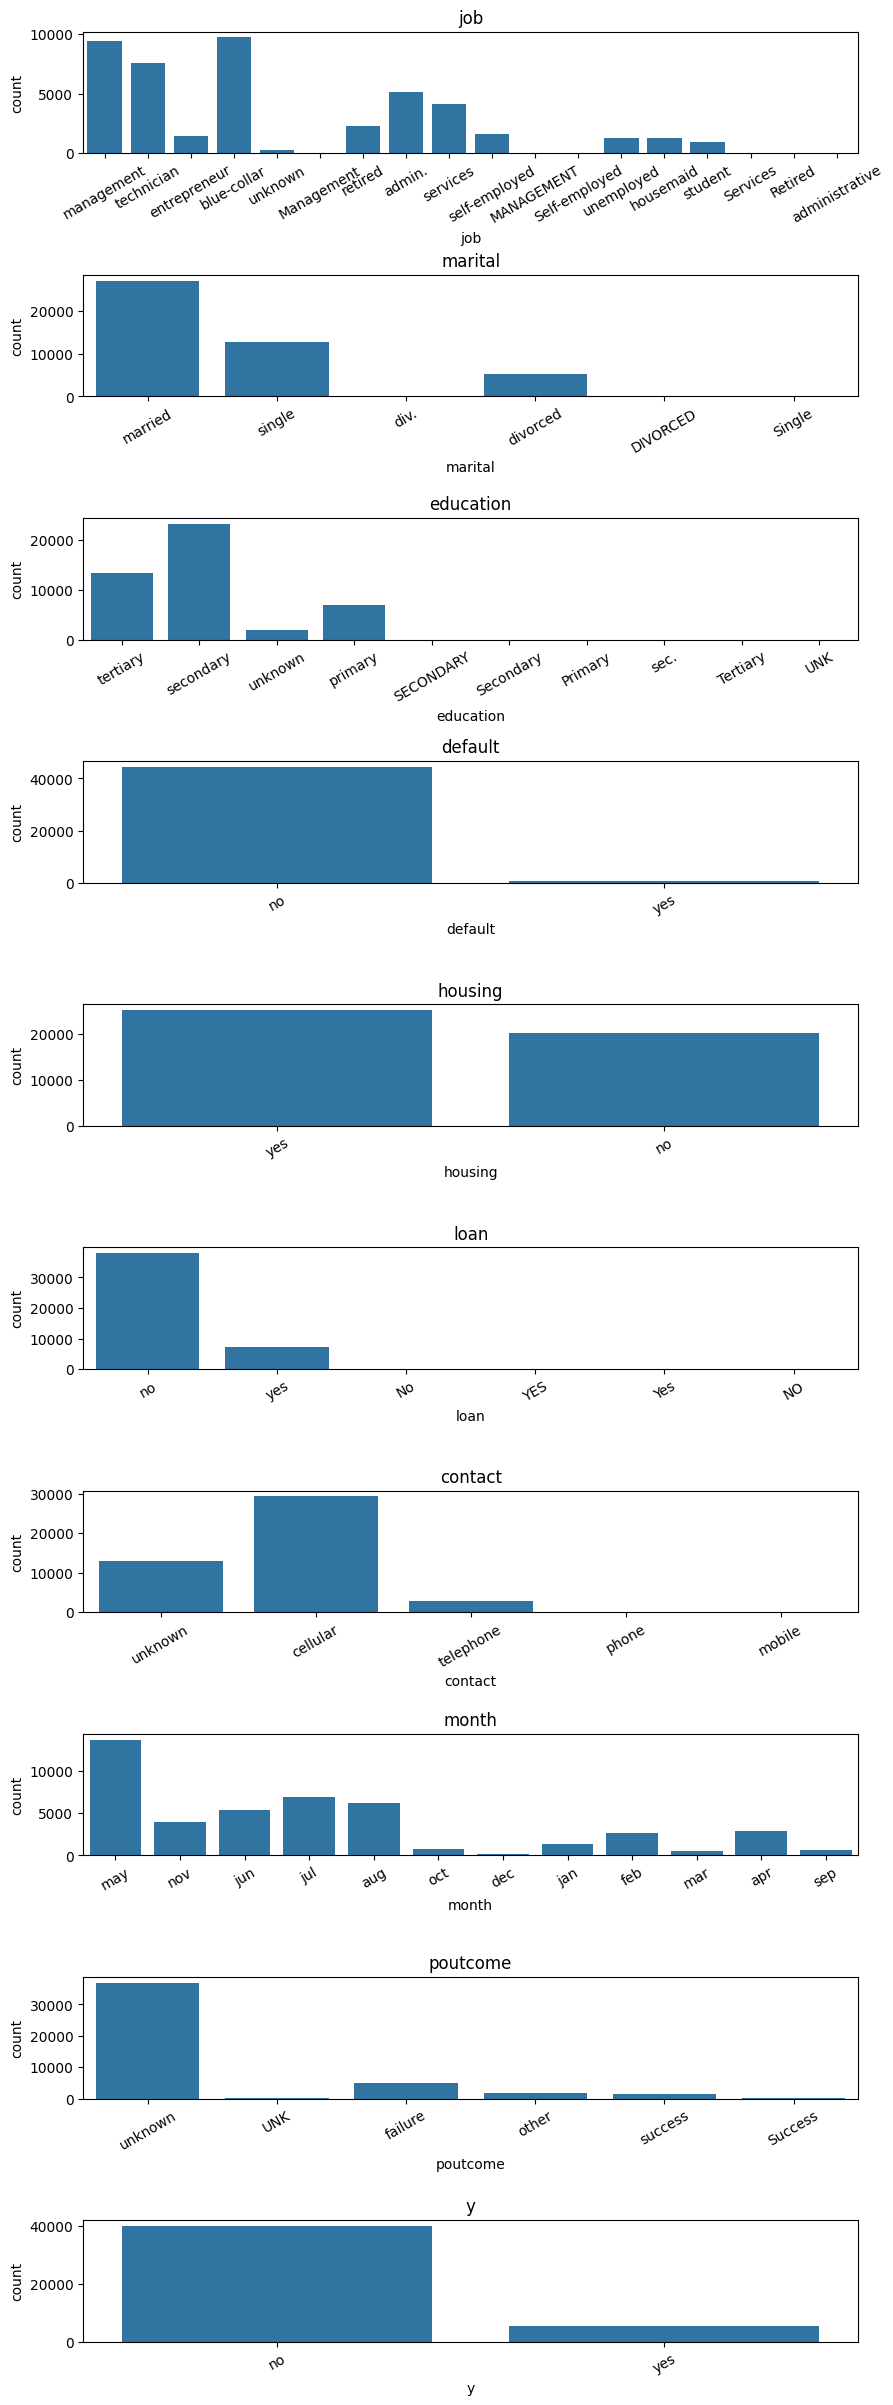

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=clientes_Banco, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

## Unifiquemos estos sub-niveles inicialmente

<ipython-input-20-506e9d43f806>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-506e9d43f806>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-506e9d43f806>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-506e9d43f806>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-20-506e9d43f806>:13: UserWarning: set_ticklabels() should only be used with a fixed n

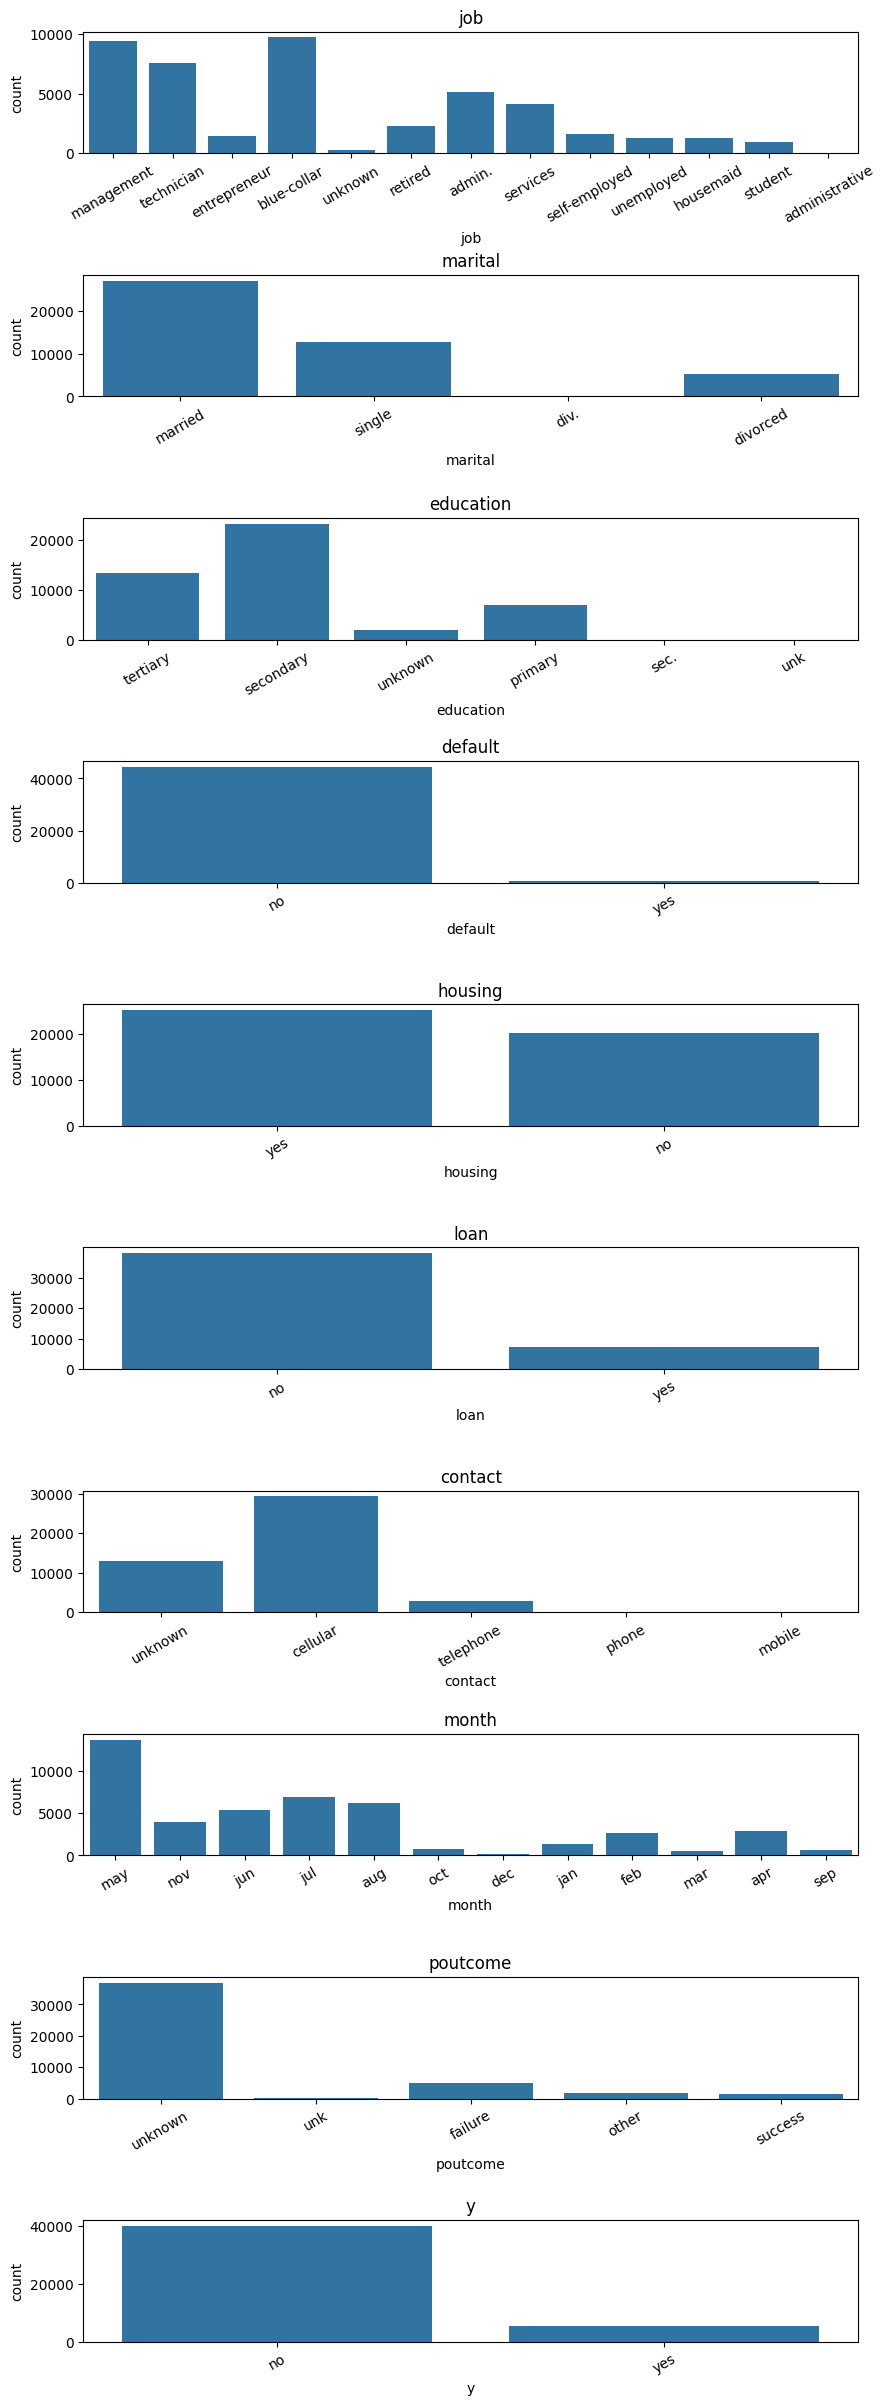

In [ ]:
for column in clientes_Banco.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        clientes_Banco[column] = clientes_Banco[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=clientes_Banco, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [ ]:
# job: unificar admin. y administrative
print(clientes_Banco['job'].unique())
clientes_Banco['job'] = clientes_Banco['job'].str.replace('admin.','administrative', regex=False)
print(clientes_Banco['job'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [ ]:
# marital: unificar div. y divorced
print(clientes_Banco['marital'].unique())
clientes_Banco['marital'] = clientes_Banco['marital'].str.replace('div.','divorced', regex=False)
print(clientes_Banco['marital'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [ ]:
# education: unificar sec. y secondary, unk y unknown
print(clientes_Banco['education'].unique())
clientes_Banco['education'] = clientes_Banco['education'].str.replace('sec.','secondary', regex=False)
clientes_Banco.loc[clientes_Banco['education']=='unk','education'] = 'unknown'
print(clientes_Banco['education'].unique())

['tertiary' 'secondary' 'unknown' 'primary' 'sec.' 'unk']
['tertiary' 'secondary' 'unknown' 'primary']


In [ ]:
# contact: unificar telephone y phone
print(clientes_Banco['contact'].unique())
clientes_Banco.loc[clientes_Banco['contact']=='phone','contact'] = 'telephone'
clientes_Banco.loc[clientes_Banco['contact']=='mobile','contact'] = 'cellular'
print(clientes_Banco['contact'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone']


In [ ]:
# poutcome: unificar unk y unknown
print(clientes_Banco['poutcome'].unique())
clientes_Banco.loc[clientes_Banco['poutcome']=='unk','poutcome']='unknown'
print(clientes_Banco['poutcome'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'failure' 'other' 'success']


<ipython-input-26-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-26-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-26-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-26-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
<ipython-input-26-0de8eda2b128>:11: UserWarning: set_ticklabels() should only be used with a fixed n

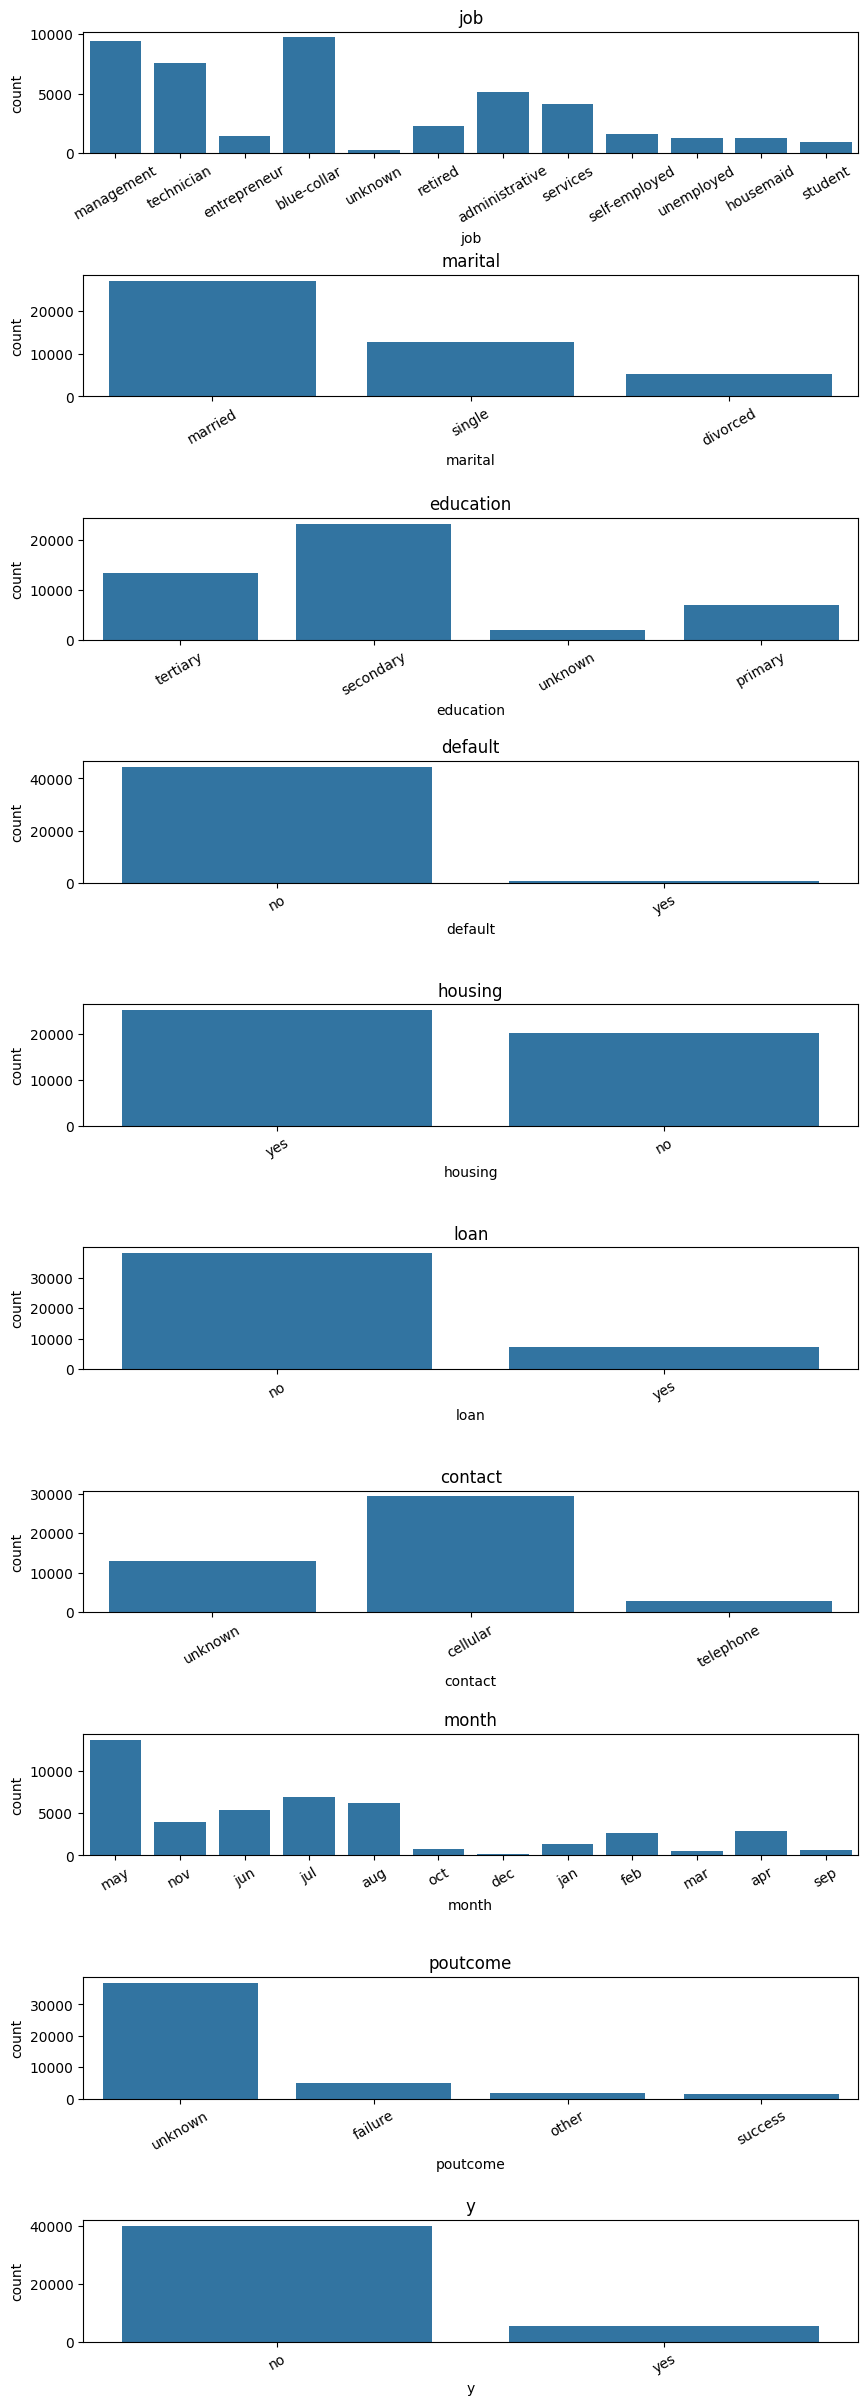

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=clientes_Banco, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

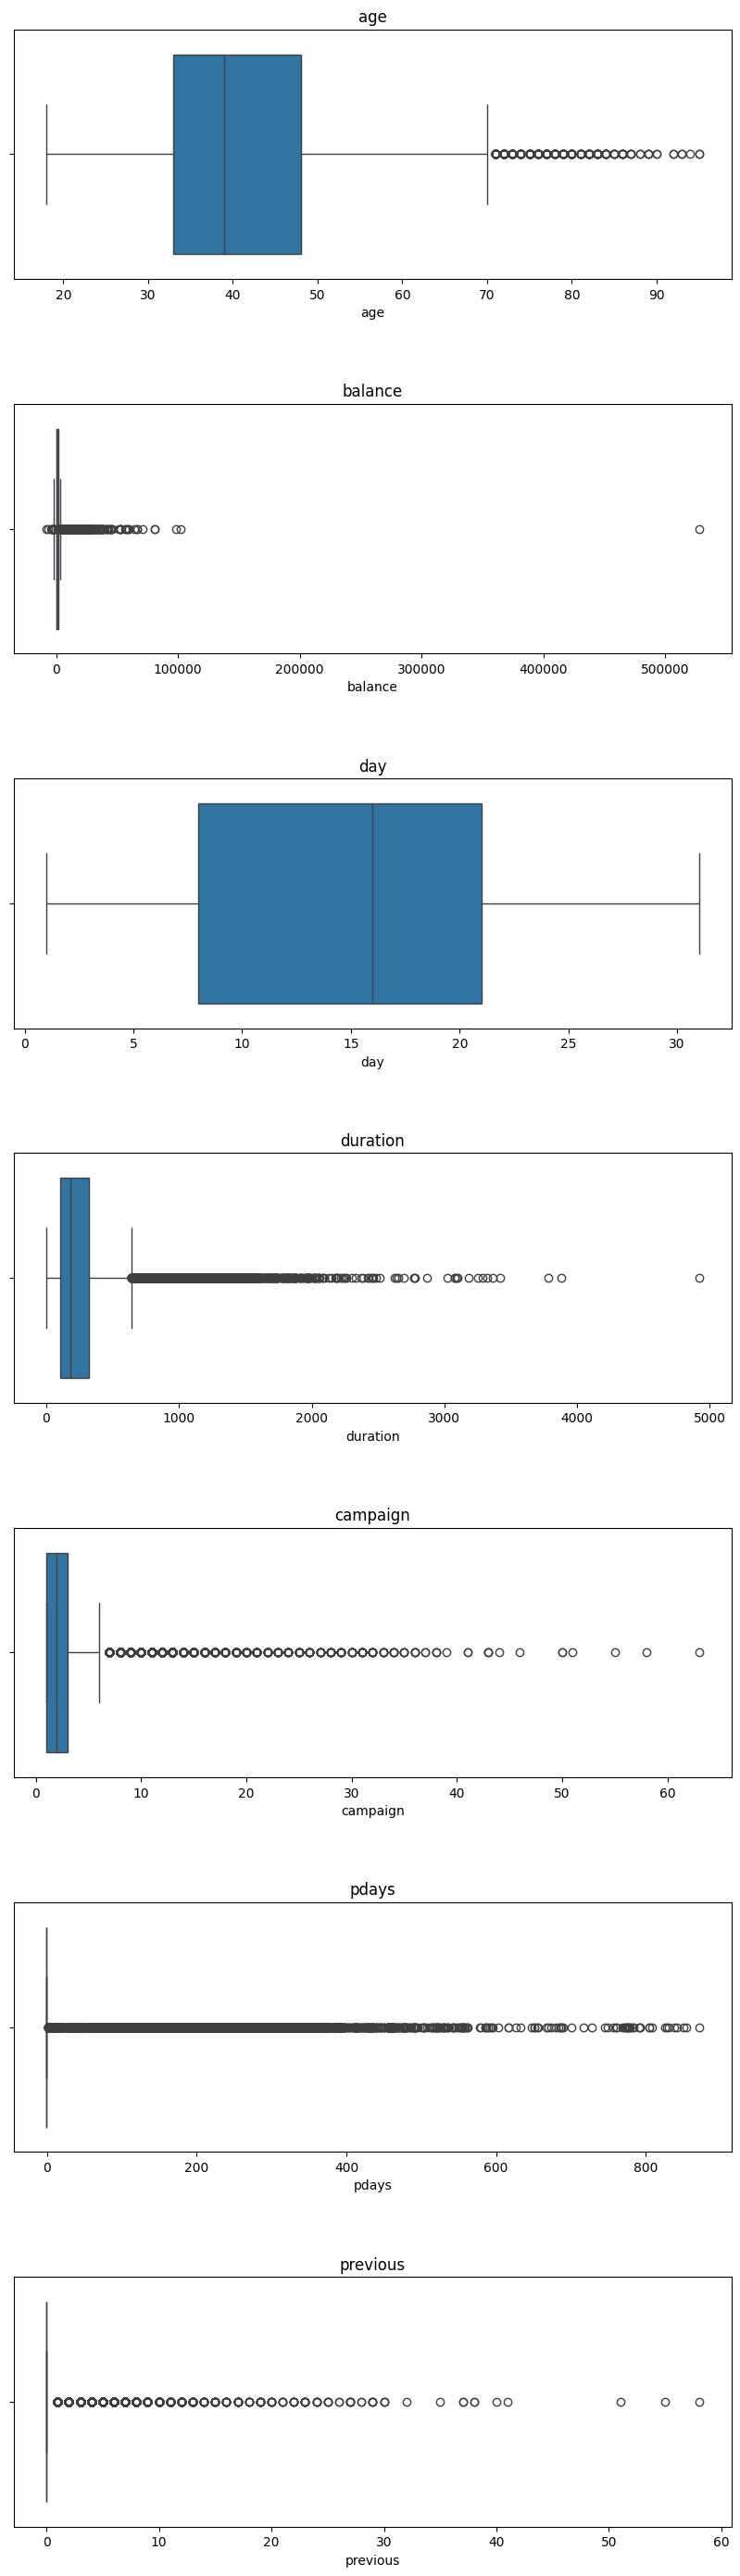

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
col_num = ['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']


fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10,35))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=clientes_Banco, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
print(clientes_Banco.shape)
clientes_Banco

(45197, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


## **Exportar dataset a csv**

In [ ]:
#exportar a csv
clientes_Banco.to_csv('clientes_Banco_clean.csv', index=False)


## **¡Ya hemos realizado la limpieza de nuestro set de datos!**

* Originalmente el dataset tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

* El dataset ya está listo para el Análisis Exploratorio.